---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 3: Modelos climáticos simples </font>**
### **<font color="DodgerBlue"> Notebook 2: FAIR con escenarios </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---
 

## **<font color="ForestGreen"> Simulaciones con FaIR utilizando escenarios de CMIP6 </font>**

FaIR permite correr simulaciones utilizando muchas variables pre-cargadas producto de las actividades de CMIP6. Por ejemplo, podemos utilizar escenarios, forzamientos y resultados globales de modelos participantes en CMIP6. 

Elementos ya incluidos en FaIR:

1. Forzamientos naturales. 
2. Escenarios de emisión. 
3. Respuesta global a forzamientos para cada modelo participante en CMIP6 (66 modelos).

En este notebook analizaremos la versión más directa para correr a FaIR a partir de los escenarios de emisiones de CMIP6, también llamados SSP-driven, donde SSP es Shared SocioEconomic Pathway https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/. 


Además, es importante mencionar que para este notebook y muchas simulaciones utilizaremos un enfoque estocástico. Esto quiere decir que correremos el modelo varias veces para la misma configuración variando ligeramente las condiciones iniciales. La idea es medir la incertidumbre a las condiciones iniciales (gracias, señor Lorenz, por darnos más trabajo). 





In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from fair import FAIR
from fair.io import read_properties
from fair.interface import fill, initialise
from fair.earth_params import seconds_per_year

In [102]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

## **<font color="ForestGreen"> Paso 1: Iniciar la clase </font>**

Iniciar la clase quiere decir llamar a la función que engloba a la clase y guardarla dentro de una variable. 

In [103]:
f = FAIR()

## **<font color="ForestGreen"> Paso 2 Tiempo de simulacion </font>**

En este caso los escenarios están definidos de 1750 a 2100.

In [104]:
f.define_time(1750, 2100, 1)

## **<font color="ForestGreen"> Paso 3: definir los escenarios </font>**

Aquí empiezan a resaltar las diferencias con el notebook anterior. Específicamente, vamos a utilizar escenarios pre-establecidos por el IPCC.
Tomaremos los SSPs que se utilizaron en el proyecto CMIP, por lo que tenemos que utilizar los mismos nombres. 


In [105]:
# Definir lista de escenarios
scenarios = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp434', 'ssp460', 'ssp534-over', 'ssp585']
# Meterlos a la clase de Fair
f.define_scenarios(scenarios)

## **<font color="ForestGreen"> Paso 4: definir las configuraciones </font>**

En esta nueva manera de correr FaIR, la lista de configuraciones vamos a definirla utilizando los parámetros de respuesta de cada modelo climático de circulación general a un forzamiento de 4xCO2. Es decir, la configuración no física de las cajas océanicas o atmosféricas no la vamos a imponer nosotros, sino que la obtendremos de parámetros **pre-calculados** a partir del análisis de los modelos de circulación general participantes en CMIP6. 

En el siguiente paso tienen que tener cuidado de actualizar la dirección del archivo a su propio sistema operativo.
Es importante poder ubicar el archivo <font color="Red">"4xCO2_cummins_ebm3.csv"</font>.

En la siguiente celda utilizamos un paquete que no hemos utilizado mucho: Pandas. 
Espeíficamente, utilizaremos la función `pd.read_csv()` para leer un archivo CSV y cargar los datos en un DataFrame de Pandas. 
La sintaxis de `pd.read_csv()` es sencilla, siempre y cuando nuestros datos de csv estén bien formateados de origen ya que el primer y único argumento obligatorio es el "path" al archivo que queramos abrir. 

In [106]:
# Cargamos datos existentes ya en el paquete, para eso tenemos que saber donde esta el paquete fair en nuestro OS
df = pd.read_csv("4xCO2_cummins_ebm3.csv")
print(df)

              model       run  conv   nit      gamma        C1          C2  \
0       CAMS-CSM1-0  r1i1p1f1  True  4809  28.239872  2.632439    9.262195   
1       GISS-E2-2-G  r1i1p1f1  True  3965   2.385368  3.601142   11.333337   
2        NorESM2-LM  r1i1p1f1  True  1966   1.633858  4.487727  125.070697   
3     ACCESS-ESM1-5  r1i1p1f1  True  3517   2.742392  3.767727    8.922353   
4   HadGEM3-GC31-LL  r1i1p1f3  True  5953   3.129576  3.868931    9.254582   
..              ...       ...   ...   ...        ...       ...         ...   
61          TaiESM1  r1i1p1f1  True  6231   2.044911  5.064045    8.999461   
62       NorESM2-MM  r1i1p1f1  True  2562   1.480571  4.121854  121.675907   
63  HadGEM3-GC31-MM  r1i1p1f3  True  4790   3.131744  3.396641   14.143754   
64            NESM3  r1i1p1f1  True  4634   2.798083  2.492649   19.210731   
65       MIROC-ES2L  r1i1p1f2  True  3966   1.851403  4.455949   13.969912   

            C3    kappa1    kappa2    kappa3   epsilon  sigma_e

Uno de los métodos de la paquetería pandas más utilizados es el siguiente:

- `unique()`: Este método se utiliza para obtener los valores únicos en una serie. Es especialmente útil cuando se quiere identificar los distintos valores presentes en una columna de un DataFrame.

In [107]:
# obtener lista de modelos sin repetir
models = df['model'].unique()
print(models)

['CAMS-CSM1-0' 'GISS-E2-2-G' 'NorESM2-LM' 'ACCESS-ESM1-5'
 'HadGEM3-GC31-LL' 'CESM2' 'NorCPM1' 'CIESM' 'INM-CM4-8' 'CNRM-CM6-1-HR'
 'CESM2-WACCM' 'CAS-ESM2-0' 'EC-Earth3-Veg' 'MPI-ESM1-2-HR'
 'MPI-ESM1-2-LR' 'GISS-E2-1-G' 'CNRM-CM6-1' 'GISS-E2-1-H' 'CMCC-CM2-SR5'
 'MRI-ESM2-0' 'SAM0-UNICON' 'EC-Earth3' 'IPSL-CM6A-LR' 'CESM2-FV2'
 'BCC-CSM2-MR' 'ACCESS-CM2' 'MIROC6' 'FIO-ESM-2-0' 'CESM2-WACCM-FV2'
 'BCC-ESM1' 'MPI-ESM-1-2-HAM' 'KACE-1-0-G' 'GFDL-ESM4' 'UKESM1-0-LL'
 'E3SM-1-0' 'KIOST-ESM' 'IITM-ESM' 'GFDL-CM4' 'CanESM5' 'AWI-CM-1-1-MR'
 'INM-CM5-0' 'FGOALS-f3-L' 'FGOALS-g3' 'CNRM-ESM2-1' 'TaiESM1'
 'NorESM2-MM' 'HadGEM3-GC31-MM' 'NESM3' 'MIROC-ES2L']


Ahora bien, para cada modelo, tenemos ya pre-calculadas las variables de interés que determinan la configuración climática del modelo. Nos falta insertarlas en nuestra clase `f`. Esto se hace con la función `f.define_configs`. 

En nuestro notebook anterior, teníamos 3 configuraciones que nos inventamos pero en este caso tenemos 1 configuración física por cada modelo de CMIP6. Esto porque cada modelo tiene un diferente océano, atmósfera, etc. 

In [108]:
#lista vacia
configs = []
# iterando sobre todos los modelos
for imodel, model in enumerate(models):
    for run in df.loc[df['model']==model, 'run']:
        configs.append(f"{model}_{run}")
print(configs)
f.define_configs(configs)

['CAMS-CSM1-0_r1i1p1f1', 'GISS-E2-2-G_r1i1p1f1', 'NorESM2-LM_r1i1p1f1', 'ACCESS-ESM1-5_r1i1p1f1', 'HadGEM3-GC31-LL_r1i1p1f3', 'CESM2_r1i1p1f1', 'NorCPM1_r1i1p1f1', 'CIESM_r1i1p1f1', 'INM-CM4-8_r1i1p1f1', 'CNRM-CM6-1-HR_r1i1p1f2', 'CESM2-WACCM_r1i1p1f1', 'CAS-ESM2-0_r1i1p1f1', 'EC-Earth3-Veg_r1i1p1f1', 'MPI-ESM1-2-HR_r1i1p1f1', 'MPI-ESM1-2-LR_r1i1p1f1', 'GISS-E2-1-G_r102i1p1f1', 'GISS-E2-1-G_r1i1p1f1', 'GISS-E2-1-G_r1i1p3f1', 'GISS-E2-1-G_r1i1p5f1', 'CNRM-CM6-1_r1i1p1f2', 'GISS-E2-1-H_r1i1p1f1', 'GISS-E2-1-H_r1i1p3f1', 'CMCC-CM2-SR5_r1i1p1f1', 'MRI-ESM2-0_r1i1p1f1', 'MRI-ESM2-0_r4i1p1f1', 'MRI-ESM2-0_r7i1p1f1', 'MRI-ESM2-0_r13i1p1f1', 'MRI-ESM2-0_r10i1p1f1', 'MRI-ESM2-0_r1i2p1f1', 'SAM0-UNICON_r1i1p1f1', 'EC-Earth3_r3i1p1f1', 'EC-Earth3_r8i1p1f1', 'IPSL-CM6A-LR_r1i1p1f1', 'CESM2-FV2_r1i1p1f1', 'BCC-CSM2-MR_r1i1p1f1', 'ACCESS-CM2_r1i1p1f1', 'MIROC6_r1i1p1f1', 'FIO-ESM-2-0_r1i1p1f1', 'FIO-ESM-2-0_r2i1p1f1', 'FIO-ESM-2-0_r3i1p1f1', 'CESM2-WACCM-FV2_r1i1p1f1', 'BCC-ESM1_r1i1p1f1', 'MPI-ESM-

In [109]:
species, properties = read_properties()
print(species)
print(properties)

['CO2 FFI', 'CO2 AFOLU', 'CO2', 'CH4', 'N2O', 'Sulfur', 'BC', 'OC', 'NH3', 'NOx', 'VOC', 'CO', 'CFC-11', 'CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b', 'CCl4', 'CHCl3', 'CH2Cl2', 'CH3Cl', 'CH3CCl3', 'CH3Br', 'Halon-1202', 'Halon-1211', 'Halon-1301', 'Halon-2402', 'CF4', 'C2F6', 'C3F8', 'c-C4F8', 'C4F10', 'C5F12', 'C6F14', 'C7F16', 'C8F18', 'NF3', 'SF6', 'SO2F2', 'HFC-125', 'HFC-134a', 'HFC-143a', 'HFC-152a', 'HFC-227ea', 'HFC-23', 'HFC-236fa', 'HFC-245fa', 'HFC-32', 'HFC-365mfc', 'HFC-4310mee', 'NOx aviation', 'Solar', 'Volcanic', 'Aerosol-radiation interactions', 'Aerosol-cloud interactions', 'Ozone', 'Contrails', 'Light absorbing particles on snow and ice', 'Stratospheric water vapour', 'Land use', 'Equivalent effective stratospheric chlorine']
{'CO2 FFI': {'type': 'co2 ffi', 'input_mode': 'emissions', 'greenhouse_gas': False, 'aerosol_chemistry_from_emissions': False, 'aerosol_chemistry_from_concentration': False}, 'CO2 AFOLU': {'type': 'co2 afolu', 

## **<font color="ForestGreen"> Paso 5. Definir especies y sus propiedades </font>**

Ahora hacemos uso de las funciones especiales incluidas en FaIR para poder rellenar el modelo con parámetros razonables rápidamente. 

Una de estas funciones es `read_properties` que obtiene los parámetros estándar, o por default, de cada especie para una simulación que sea derivada de emisiones. Este paso nos evita andar buscando cuál es el peso molecular de todas las moléculas. 

In [110]:
# Veamos solo las primeras 5
species[:5]

['CO2 FFI', 'CO2 AFOLU', 'CO2', 'CH4', 'N2O']

In [111]:
# Y las propiedades de una de ellas
properties['CO2 FFI']

{'type': 'co2 ffi',
 'input_mode': 'emissions',
 'greenhouse_gas': False,
 'aerosol_chemistry_from_emissions': False,
 'aerosol_chemistry_from_concentration': False}

El paso crucial es utilizar la lista `species` y el diccionario `properties` en la funcion `define_species` para que las especies queden bien configuradas para nuestras simulaciones

In [112]:
f.define_species(species, properties)

## **<font color="ForestGreen"> Paso 6: Generar los datos de input y output </font>**

El método `f.allocate` así como en el notebook pasado, es la función que genera los arrays necesarios, pero importante recordar que en este paso están vacíos! Hasta ahora sólo existen los arreglos pero falta 1) terminar de configurar el modelo y 2) simularlo.

In [113]:
f.allocate()

## **<font color="ForestGreen"> Paso 7: rellenando los datos </font>**

Ahora podemos terminar la configuración del modelo  que requiere 3 cosas más y ya:

1. Rellenar la configuración de especies químicas `f.fill_species_configs()`. 
2. Rellenar las emisiones, concentraciones y el forzamiento con los escenarios de CMIP `f.fill_from_rcmip()`.
3. Configurar los parámetros físicos de cada configuración (modelo). 
4. Inicializar las concentraciones, emisiones, forzamiento y temperatura. `initialise()`

#### **<font color="ForestGreen">Paso 7a. Configuración de especies químicas  </font>**

Si no queremos modificar los parámetros de las especies químicas, que difícilmente queremos hacer en este curso, podemos sólo correr el siguiente comando:



In [114]:
f.fill_species_configs()

#### **<font color="ForestGreen">Paso 7b. Escenarios de CMIP  </font>**

Esta línea de código hace lo que hicimos nosotros específicando los escenarios suaves o abruptos, pero utilizando los valores pre-establecidos por CMIP y el IPCC.

In [115]:
f.fill_from_rcmip()

#### **<font color="ForestGreen">Paso 7c: condiciones iniciales  </font>**

Así como en el ejercicio pasado, empezamos los forzamientos y temperatura en 0, pero las concentraciones iniciales las obtenemos del la concentración pre-industrial con el objeto `f.species_configs['baseline_concentration']`.

In [116]:
initialise(f.concentration, f.species_configs['baseline_concentration'])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

#### **<font color="ForestGreen">Paso 7d: configuraciones climáticas  </font>**

Ahora el paso más truculento, rellenar los valores climáticos necesarios, como lo es el calor específico del océano en cada capa, las constantes de transferencia de calor, etc. 
Para esto necesitamos cargar primero para cada modelo sus parámetros, que alguien más afortunadamente ya calculó para nosotros y que nosotros guardamos en nuestro objeto de Pandas `df`. 

Noten bien que el parámetro "seed" se refiere al parámetro de condiciones iniciales y nos dice algo sobre cuántas condiciones iniciales diferentes se intentan para cada modelo y cada simulación.

In [117]:
# Parámetro estocastico
seed = 1355763

# Para cada configuracion tenemos que establecer los parametros, entonces lo hacemos en un loop
for config in configs:
    model, run = config.split('_')
    condition = (df['model']==model) & (df['run']==run)
    fill(f.climate_configs['ocean_heat_capacity'], df.loc[condition, 'C1':'C3'].values.squeeze(), config=config)
    fill(f.climate_configs['ocean_heat_transfer'], df.loc[condition, 'kappa1':'kappa3'].values.squeeze(), config=config)
    fill(f.climate_configs['deep_ocean_efficacy'], df.loc[condition, 'epsilon'].values[0], config=config)
    fill(f.climate_configs['gamma_autocorrelation'], df.loc[condition, 'gamma'].values[0], config=config)
    fill(f.climate_configs['sigma_eta'], df.loc[condition, 'sigma_eta'].values[0], config=config)
    fill(f.climate_configs['sigma_xi'], df.loc[condition, 'sigma_xi'].values[0], config=config)
    fill(f.climate_configs['stochastic_run'], True, config=config)
    fill(f.climate_configs['use_seed'], True, config=config)
    fill(f.climate_configs['seed'], seed, config=config)
    
    seed = seed + 399

Se encuentra usted perdido en este notebook o en la vida. Tal vez le sea importante recordar exactamente cómo funciona FaIR y su esquema general de qué tipo de modelo es. 

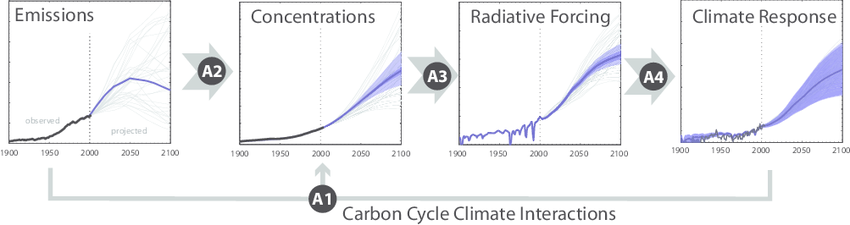

Es decir, en FaIR imponemos un escenario de emisiones con lo cuál el modelo obtiene concentraciones en la atmósfera, producto de las fuentes y sumideros. Las concentraciones, cuando cambian en el tiempo, generan un forzamiento y el forzamiento una respuesta climática. 

Recuerden que algunos objetos que ya tiene nuestra clase y nos podría ser útiles son: `f.emissions`, `f.concentration`, `f.scenarios`, `f.configs`.

El número total de simulaciones, por ejemplo, está dado por el número de escenarios y el número de configuraciones. Por la multiplicación de estos dos factores para ser precisos.

In [118]:
print('simulaciones totales:',len(f.scenarios)*len(f.configs))

simulaciones totales: 528


## <font color="ForestGreen">Paso 8. Correr FaIR  </font>


In [119]:
f.run()

Running 528 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

Ahora vamos a graficar nuestros resultados bonitos. Pero antes, hay que investigar que resultados tenemos. 
Primero tenemos que recordar el nombre de los modelos hemos utilizado y cómo se llaman. Esto ya lo hemos impreso a pantalla antes pero lo volvemos a hacer. 

In [120]:
f.configs

['CAMS-CSM1-0_r1i1p1f1',
 'GISS-E2-2-G_r1i1p1f1',
 'NorESM2-LM_r1i1p1f1',
 'ACCESS-ESM1-5_r1i1p1f1',
 'HadGEM3-GC31-LL_r1i1p1f3',
 'CESM2_r1i1p1f1',
 'NorCPM1_r1i1p1f1',
 'CIESM_r1i1p1f1',
 'INM-CM4-8_r1i1p1f1',
 'CNRM-CM6-1-HR_r1i1p1f2',
 'CESM2-WACCM_r1i1p1f1',
 'CAS-ESM2-0_r1i1p1f1',
 'EC-Earth3-Veg_r1i1p1f1',
 'MPI-ESM1-2-HR_r1i1p1f1',
 'MPI-ESM1-2-LR_r1i1p1f1',
 'GISS-E2-1-G_r102i1p1f1',
 'GISS-E2-1-G_r1i1p1f1',
 'GISS-E2-1-G_r1i1p3f1',
 'GISS-E2-1-G_r1i1p5f1',
 'CNRM-CM6-1_r1i1p1f2',
 'GISS-E2-1-H_r1i1p1f1',
 'GISS-E2-1-H_r1i1p3f1',
 'CMCC-CM2-SR5_r1i1p1f1',
 'MRI-ESM2-0_r1i1p1f1',
 'MRI-ESM2-0_r4i1p1f1',
 'MRI-ESM2-0_r7i1p1f1',
 'MRI-ESM2-0_r13i1p1f1',
 'MRI-ESM2-0_r10i1p1f1',
 'MRI-ESM2-0_r1i2p1f1',
 'SAM0-UNICON_r1i1p1f1',
 'EC-Earth3_r3i1p1f1',
 'EC-Earth3_r8i1p1f1',
 'IPSL-CM6A-LR_r1i1p1f1',
 'CESM2-FV2_r1i1p1f1',
 'BCC-CSM2-MR_r1i1p1f1',
 'ACCESS-CM2_r1i1p1f1',
 'MIROC6_r1i1p1f1',
 'FIO-ESM-2-0_r1i1p1f1',
 'FIO-ESM-2-0_r2i1p1f1',
 'FIO-ESM-2-0_r3i1p1f1',
 'CESM2-WACCM-FV2_r

Vamos a seleccionar uno, por ejemplo 'EC-Earth3-Veg_r1i1p1f1' y veamos sus resultados, por ejemplo para el forzamiento como función del tiempo y del escenario.

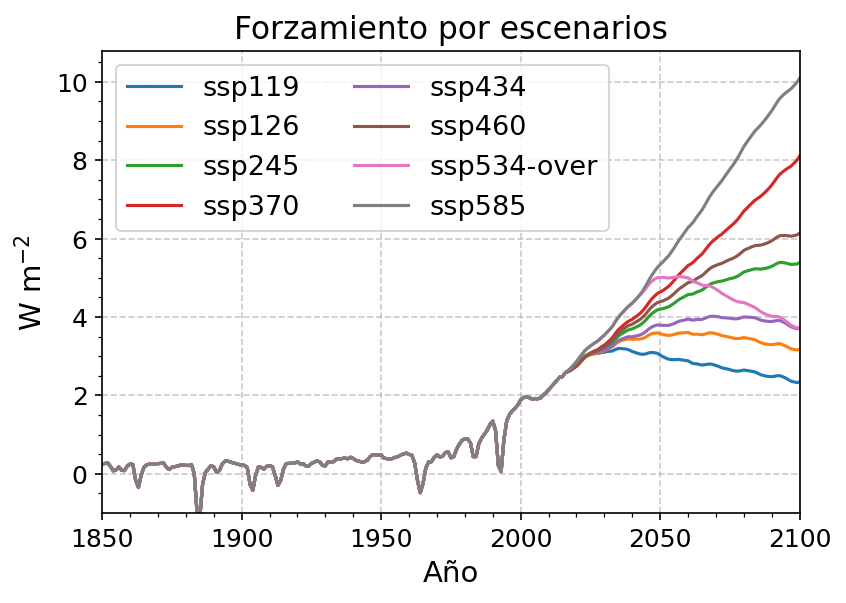

In [121]:
model='EC-Earth3-Veg_r1i1p1f1'
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.forcing_sum.loc[dict(config=model)], label=f.scenarios)
lineplot_setup(1850,2100,'Año','W m$^{-2}$',ymin=-1,legend=False,title='Forzamiento por escenarios')
plt.legend(fancybox=True,ncol=2,fontsize=13)

Estos escenarios son exactamente iguales en el período histórico y sólo cambian a partir de 2014!

Ahora repetimos lo mismo pero para temperatura. Recuerden que la temperatura además tiene 3 capas. 

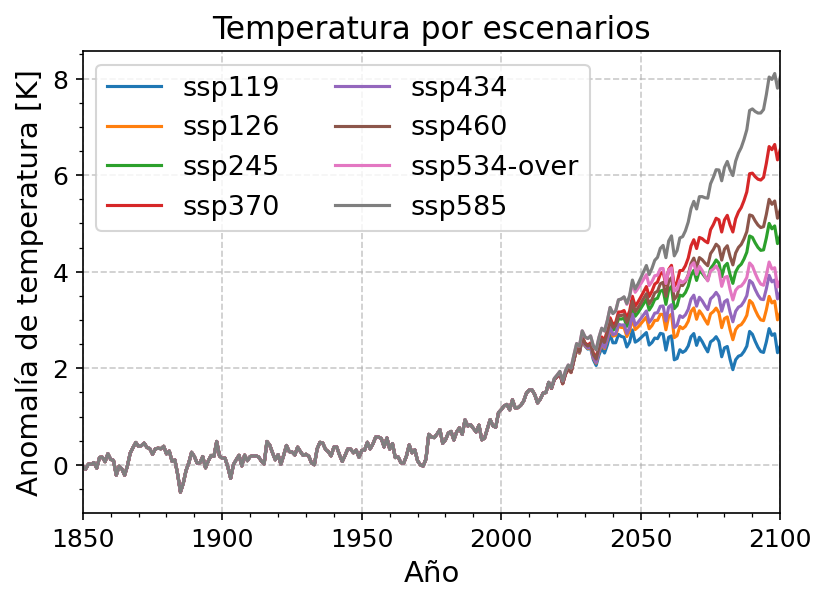

In [122]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.temperature.loc[dict(config=model,layer=0)], label=f.scenarios);
lineplot_setup(1850,2100,'Año','Anomalía de temperatura [K]',ymin=-1,legend=False,title='Temperatura por escenarios')
plt.legend(fancybox=True,ncol=2,fontsize=13)

Otras variables raras en FaIR. 

TOA imbalance: desbalance energético en el tope de la atmósfera. `f.toa_imbalance`.

OHC: contenido de calor en el océano. `f.ocean_heat_content`.

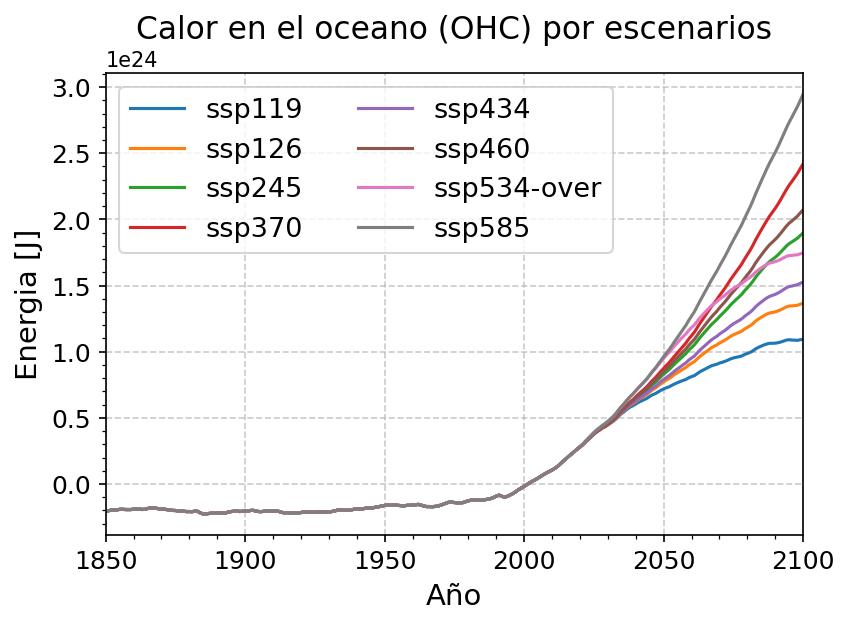

In [123]:
plt.figure(figsize=(6,4),dpi=150)
plt.plot(f.timebounds, f.ocean_heat_content_change.loc[dict(config=model)], label=f.scenarios);
lineplot_setup(1850,2100,'Año','Energia [J]',legend=False,title='Calor en el oceano (OHC) por escenarios')
plt.legend(fancybox=True,ncol=2,fontsize=13)


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 3 - FaIR versión CMIP </font>**

<font color="DarkBlue"> 1. Grafique la serie de tiempo de la temperatura resultado de la simulación anterior para 5 modelos (configuraciones) diferentes en el escenario ssp585. Muestre en la leyenda los nombres de los modelos. 
    
    
---

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 4 - FaIR versión CMIP 2 </font>**

<font color="DarkBlue"> 1. Grafique la serie de tiempo del desbalance en el tope de la atmósfera resultado de la simulación anterior para 5 modelos (configuraciones) diferentes entre sí, pero que pueden ser las mismas que en el ejercicio anterior, en el escenario ssp119. Muestre en la leyenda los nombres de los modelos. 
          
---

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 5 - Entendiendo los escenarios </font>**

<font color="DarkBlue"> 1. Grafique la serie de tiempo de la concentración de CO$_2$ para cada escenario. Escoja 1 configuración y un modelo.
    
<font color="DarkBlue"> 2. Explique las diferencias en la concentración de CO$_2$ entre los escenarios usando lo que sabe de escenarios. 
    
<font color="DarkBlue"> 3. Muestra la serie de tiempo de otra especie química para todos los escenarios.
    
---